# Proyek Analisis Data: Bike Sharing Dataset

*   Nama: Rizqulloh Rifqi Edwanto
*   Email: rizqullohr93@gmail.com
*   ID Dicoding: rizqullohr



## Latar Belakang

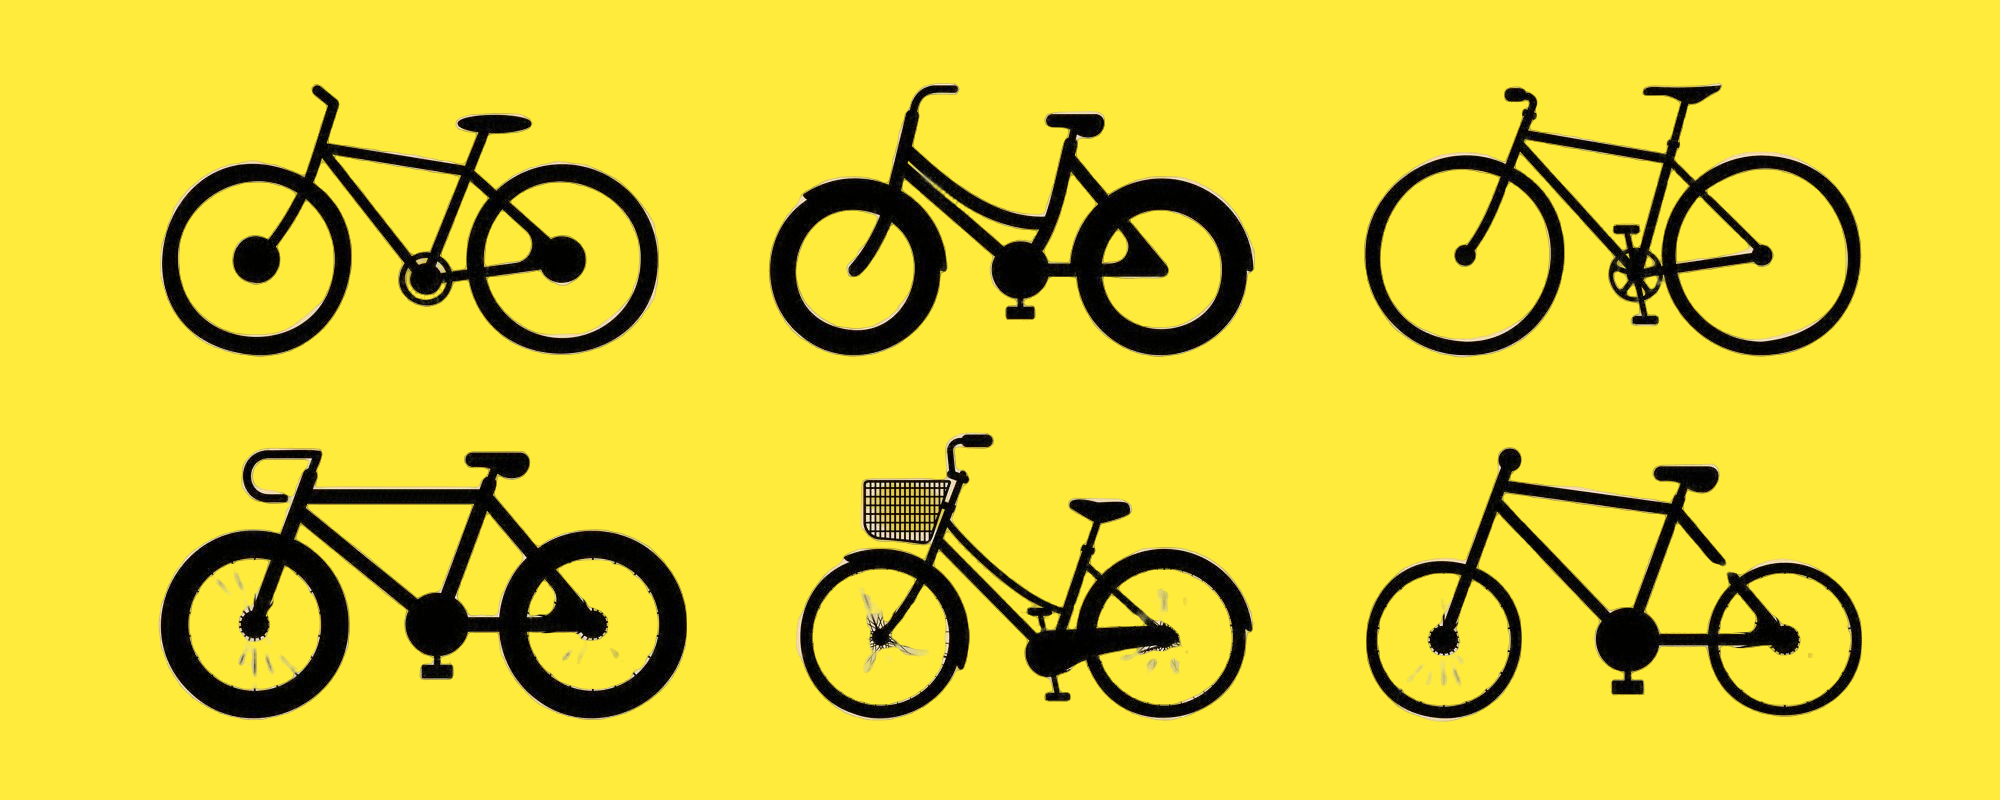


Sistem berbagi sepeda merupakan generasi baru dari penyewaan sepeda tradisional, di mana seluruh proses keanggotaan, penyewaan, dan pengembalian sepeda dilakukan secara otomatis. Dengan sistem ini, pengguna dapat dengan mudah menyewa sepeda di satu lokasi dan mengembalikannya di lokasi lain. Saat ini, lebih dari 500 program berbagi sepeda telah diimplementasikan di seluruh dunia, mencakup lebih dari 500 ribu sepeda. Sistem ini menarik minat besar karena perannya yang signifikan dalam mengatasi masalah lalu lintas, lingkungan, dan kesehatan.

Selain penerapannya yang bermanfaat dalam kehidupan sehari-hari, karakteristik data yang dihasilkan dari sistem berbagi sepeda juga menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, sistem ini secara spesifik mencatat durasi perjalanan serta lokasi keberangkatan dan kedatangan. Fitur ini menjadikan sistem berbagi sepeda sebagai jaringan sensor virtual yang dapat digunakan untuk memantau mobilitas di kota. Dengan demikian, diharapkan berbagai kejadian penting di kota dapat terdeteksi melalui pemantauan data ini.

## Menentukan Pertanyaan Bisnis


---


*   Apa saja faktor lingkungan dan musim yang paling mempengaruhi tingkat penyewaan sepeda di Washington D.C., dan seberapa besar dampaknya terhadap jumlah pengguna sepeda per jam atau per hari?
*   Bagaimana tren penggunaan sepeda berubah selama akhir pekan dan hari kerja, serta apakah terdapat pola tertentu yang mengindikasikan permintaan tinggi pada hari libur atau selama peristiwa besar di kota?
*   Bagaimana pola penyewaan sepeda berdasarkan jenis pengguna (kasual dan terdaftar) pada berbagai kondisi cuaca dan waktu dalam sehari?
*   Apakah terdapat korelasi antara suhu, kelembapan, dan kecepatan angin dengan frekuensi penyewaan sepeda?
* Apakah ada tren musiman dalam penggunaan sepeda, dan apakah pola ini mengalami perubahan antara tahun 2011 dan 2012?
* Apakah terjadi lonjakan atau penurunan signifikan dalam penggunaan sepeda pada saat peristiwa besar?
* Apakah penggunaan sepeda menunjukkan peningkatan pada jam-jam sibuk (misalnya pagi dan sore hari saat orang berangkat dan pulang kerja), dan apakah terdapat perbedaan signifikan dalam pola penggunaan sepeda pada jam-jam tersebut antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load datasets
day_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melihat informasi awal dari dataset harian dan jam untuk memahami bentuk data dan tipe kolom


In [4]:
hour_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [5]:
print("Dataset Harian (day.csv):")
day_df.info()

Dataset Harian (day.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [9]:
print("\nDataset Jam (hour.csv):")
hour_df.info()


Dataset Jam (hour.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight awal:
* Dataset harian terdiri dari catatan 731 hari, sedangkan dataset jam mencakup 17379 catatan per jam.
* Kolom 'dteday' akan dikonversi ke tipe datetime untuk memudahkan analisis waktu.
* Tidak ada nilai hilang atau duplikat yang terdeteksi, sehingga data tampaknya bersih pada tahap awal ini.

### Cleaning Data

#### Cleaning `day_df`

In [13]:
# Konversi kolom tanggal 'dteday' menjadi format datetime untuk kedua dataset
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [14]:
# Mengecek nilai unik untuk kolom kategori seperti 'season', 'yr', 'mnth', 'holiday', 'workingday', dan 'weathersit'
print("Nilai unik untuk kolom season di day_df:", day_df['season'].unique())

Nilai unik untuk kolom season di day_df: [1 2 3 4]


In [15]:
# Drop kolom instant
day_df = day_df.drop(columns=['instant'])

In [16]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count_day'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count_day
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [19]:
# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count_day
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  windspeed     731 non-null    float64       
 12  casual        731 non-null    int64         
 13  registered    731 non-null    int64         
 14  count_day     731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float

#### Cleaning `hour_df`

In [21]:
# Konversi kolom tanggal 'dteday' menjadi format datetime untuk kedua dataset
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [22]:
# Mengecek nilai unik untuk kolom kategori seperti 'season', 'yr', 'mnth', 'holiday', 'workingday', dan 'weathersit'
print("Nilai unik untuk kolom season di hour_df:", hour_df['season'].unique())

Nilai unik untuk kolom season di hour_df: [1 2 3 4]


In [23]:
# Drop kolom instant
hour_df = hour_df.drop(columns=['instant'])

In [24]:
hour_df.tail()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [25]:
# Mengubah nama judul kolom
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count_hour'
}, inplace=True)

hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count_hour
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
# Mengubah angka menjadi keterangan
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weather_cond'] = hour_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [27]:
# Mengubaha tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weather_cond'] = hour_df.weather_cond.astype('category')

hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count_hour
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


#### Menggambungkan data `hour_df` dengan `day_df`

In [28]:
# Menggabungkan data per jam (hour_df) dengan data harian (day_df) hanya pada kolom 'dteday' dan 'hr'
merged_df = pd.merge(
    left=day_df,
    right=hour_df[['dateday', 'hour', 'count_hour']],  # Mengambil hanya kolom 'hr' dan 'cnt_hour' dari hour_df
    how="left",  # Menyimpan semua data dari day_df dan menambahkan data per jam
    on="dateday"  # Menggabungkan berdasarkan kolom 'dteday'
)

# Melihat beberapa baris pertama dari data hasil gabungan
display(merged_df.head())
print("Jumlah baris setelah gabungan:", len(merged_df))

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count_day,hour,count_hour
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0,16
1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,1,40
2,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,2,32
3,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,3,13
4,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1


Jumlah baris setelah gabungan: 17379


In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       17379 non-null  datetime64[ns]
 1   season        17379 non-null  category      
 2   year          17379 non-null  category      
 3   month         17379 non-null  category      
 4   holiday       17379 non-null  category      
 5   weekday       17379 non-null  category      
 6   workingday    17379 non-null  category      
 7   weather_cond  17379 non-null  category      
 8   temp          17379 non-null  float64       
 9   atemp         17379 non-null  float64       
 10  hum           17379 non-null  float64       
 11  windspeed     17379 non-null  float64       
 12  casual        17379 non-null  int64         
 13  registered    17379 non-null  int64         
 14  count_day     17379 non-null  int64         
 15  hour          17379 non-null  int64 

In [30]:
merged_df.isna().sum()

,0
dateday,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weather_cond,0
temp,0
atemp,0


#### Daftar Hari Libur dan Peristiwa Besar Washington D.C. (2011-2012)
Hari Libur Nasional Amerika Serikat
* New Year’s Day - Januari 1 (2011 & 2012)
* Martin Luther King Jr. Day - Januari 17, 2011; Januari 16, 2012
* Presidents’ Day - Februari 21, 2011; Februari 20, 2012
* Memorial Day - Mei 30, 2011; Mei 28, 2012
* Independence Day - Juli 4 (2011 & 2012)
* Labor Day - September 5, 2011; September 3, 2012
* Columbus Day - Oktober 10, 2011; Oktober 8, 2012
* Veterans Day - November 11 (2011 & 2012)
* Thanksgiving Day - November 24, 2011; November 22, 2012
* Christmas Day - Desember 25 (2011 & 2012)

Hari Libur atau Perayaan Tambahan
* Valentine's Day - Februari 14 (2011 & 2012)
* Halloween - Oktober 31 (2011 & 2012)
* Peristiwa Besar Lainnya
* Hurricane Irene - Agustus 27-28, 2011
* Hurricane Sandy - Oktober 29, 2012

In [31]:
holiday_events = {
    '2011-01-01': 'New Year’s Day',
    '2011-01-17': 'Martin Luther King Jr. Day',
    '2011-02-14': 'Valentine’s Day',
    '2011-02-21': 'Presidents’ Day',
    '2011-05-30': 'Memorial Day',
    '2011-07-04': 'Independence Day',
    '2011-09-05': 'Labor Day',
    '2011-10-10': 'Columbus Day',
    '2011-10-31': 'Halloween',
    '2011-11-11': 'Veterans Day',
    '2011-11-24': 'Thanksgiving Day',
    '2011-12-25': 'Christmas Day',
    '2011-08-27': 'Hurricane Irene',
    '2011-08-28': 'Hurricane Irene',
    '2012-01-01': 'New Year’s Day',
    '2012-01-16': 'Martin Luther King Jr. Day',
    '2012-02-14': 'Valentine’s Day',
    '2012-02-20': 'Presidents’ Day',
    '2012-05-28': 'Memorial Day',
    '2012-07-04': 'Independence Day',
    '2012-09-03': 'Labor Day',
    '2012-10-08': 'Columbus Day',
    '2012-10-31': 'Halloween',
    '2012-11-11': 'Veterans Day',
    '2012-11-22': 'Thanksgiving Day',
    '2012-12-25': 'Christmas Day',
    '2012-10-29': 'Hurricane Sandy'
}

# Menandai tanggal-tanggal yang termasuk hari libur atau peristiwa besar
merged_df['is_event'] = merged_df['dateday'].apply(lambda x: holiday_events.get(x, 'None'))
merged_df['event_flag'] = merged_df['is_event'].apply(lambda x: 1 if x != 'None' else 0)

# Melihat hasilnya
display(merged_df[['dateday', 'is_event', 'event_flag']].head(15))

,dateday,is_event,event_flag
0,2011-01-01,None,0
1,2011-01-01,None,0
2,2011-01-01,None,0
3,2011-01-01,None,0
4,2011-01-01,None,0
5,2011-01-01,None,0
6,2011-01-01,None,0
7,2011-01-01,None,0
8,2011-01-01,None,0
9,2011-01-01,None,0


In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       17379 non-null  datetime64[ns]
 1   season        17379 non-null  category      
 2   year          17379 non-null  category      
 3   month         17379 non-null  category      
 4   holiday       17379 non-null  category      
 5   weekday       17379 non-null  category      
 6   workingday    17379 non-null  category      
 7   weather_cond  17379 non-null  category      
 8   temp          17379 non-null  float64       
 9   atemp         17379 non-null  float64       
 10  hum           17379 non-null  float64       
 11  windspeed     17379 non-null  float64       
 12  casual        17379 non-null  int64         
 13  registered    17379 non-null  int64         
 14  count_day     17379 non-null  int64         
 15  hour          17379 non-null  int64 

In [33]:
merged_df.isna().sum()

,0
dateday,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weather_cond,0
temp,0
atemp,0


In [34]:
merged_df

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count_day,hour,count_hour,is_event,event_flag
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0,16,None,0
1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,1,40,None,0
2,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,2,32,None,0
3,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,3,13,None,0
4,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,1,Dec,0,Mon,1,Misty/Cloudy,0.215833,0.223487,0.577500,0.154846,439,2290,2729,19,119,None,0
17375,2012-12-31,Spring,1,Dec,0,Mon,1,Misty/Cloudy,0.215833,0.223487,0.577500,0.154846,439,2290,2729,20,89,None,0
17376,2012-12-31,Spring,1,Dec,0,Mon,1,Misty/Cloudy,0.215833,0.223487,0.577500,0.154846,439,2290,2729,21,90,None,0
17377,2012-12-31,Spring,1,Dec,0,Mon,1,Misty/Cloudy,0.215833,0.223487,0.577500,0.154846,439,2290,2729,22,61,None,0


In [35]:
# Cek distribusi nilai di kolom 'event_flag'
print(merged_df['event_flag'].value_counts())

event_flag
0    17379
Name: count, dtype: int64


In [36]:
# Menandai kolom event_flag berdasarkan tanggal di event_dates
merged_df['event_flag'] = merged_df['dateday'].apply(lambda x: 1 if x.strftime('%Y-%m-%d') in holiday_events else 0)

In [37]:
print(merged_df['event_flag'].value_counts())

event_flag
0    16770
1      609
Name: count, dtype: int64


In [38]:
# Menampilkan semua tanggal dengan event_flag = 1
events_marked = merged_df[merged_df['event_flag'] == 1]
display(events_marked[['dateday', 'event_flag', 'count_day']])

,dateday,event_flag,count_day
0,2011-01-01,1,985
1,2011-01-01,1,985
2,2011-01-01,1,985
3,2011-01-01,1,985
4,2011-01-01,1,985
...,...,...,...
17230,2012-12-25,1,1013
17231,2012-12-25,1,1013
17232,2012-12-25,1,1013
17233,2012-12-25,1,1013


**Insight:**
1. Konversi Tipe Data: Kolom `dteday` di `day_df` dan `hour_df` dikonversi ke tipe datetime untuk memudahkan analisis berbasis waktu. Kolom-kolom data kategorik numerik seperti `season`, `month`, `weekday`, dan `weather_condition` juga diubah ke bentuk string agar lebih mudah dibaca, lalu dikonversi ke tipe data kategorik.

2. Pengubahan Nama Kolom: Beberapa nama kolom diubah agar lebih jelas dan konsisten. Contohnya, `dteday` jadi `dateday`, `yr` jadi `year`, `cnt` jadi `count_day` atau `count_hour`, dan `weathersit` jadi `weather_cond`. Kolom instant dihapus dari kedua dataframe.

3. Penggabungan Data: Data per jam (`hour_df`) digabungkan dengan data harian (`day_df`) berdasarkan kolom `dateday`.

4. Pembuatan Kolom Hari Libur/Peristiwa Besar: Code `holiday_events` dibuat untuk menyimpan tanggal-tanggal penting seperti hari libur nasional, acara khusus, dan peristiwa cuaca di Washington D.C. untuk tahun 2011-2012. Kolom baru `event_flag` ditambahkan ke dataframe `merged_df`, yang diberi nilai 1 jika `dateday` ada dalam kamus `holiday_events`, dan 0 jika tidak.

5. Tidak ada nilai yang hilang atau duplikat yang ditemukan.

## Exploratory Data Analysis (EDA)


#### Explore `merged_df`

##### 1. Faktor lingkungan dan musim yang paling mempengaruhi tingkat penyewaan sepeda

In [39]:
# Menghitung statistik berdasarkan musim
season_stats = merged_df.groupby('season')['count_day'].agg(['max', 'min', 'mean', 'sum']).rename(columns={'max': 'max_rentals', 'min': 'min_rentals', 'mean': 'avg_rentals', 'sum': 'total_rentals'})
print("Statistik penggunaan sepeda berdasarkan musim:")
display(season_stats)

Statistik penggunaan sepeda berdasarkan musim:


<ipython-input-39-12ffdd5a5824>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_stats = merged_df.groupby('season')['count_day'].agg(['max', 'min', 'mean', 'sum']).rename(columns={'max': 'max_rentals', 'min': 'min_rentals', 'mean': 'avg_rentals', 'sum': 'total_rentals'})


,max_rentals,min_rentals,avg_rentals,total_rentals
season,,,,
Fall,8714,1115,5654.093194,25420803
Spring,7836,431,2635.348185,11179147
Summer,8362,795,4995.253119,22024071
Winter,8555,22,4765.366021,20167029


**Insight:**

- Dari distribusi penyewaan sepeda per musim, tampak bahwa musim tertentu, seperti musim panas, memiliki jumlah penyewaan sepeda yang jauh lebih tinggi dibandingkan musim lain, seperti musim dingin. Hal ini mungkin berkaitan dengan suhu yang lebih nyaman bagi pengendara sepeda.

##### 2. Tren penggunaan sepeda pada akhir pekan, hari kerja, dan hari libur

In [40]:
# Group data by weekday and calculate statistics
weekday_stats = merged_df.groupby('weekday')['count_day'].agg(['max', 'min', 'mean', 'sum'])
print("\nStatistik penggunaan sepeda berdasarkan hari:")
display(weekday_stats)

# Group data by 'holiday' and calculate statistics
holiday_stats = merged_df.groupby('holiday')['count_day'].agg(['max', 'min', 'mean', 'sum'])
print("\nStatistik penggunaan sepeda berdasarkan hari libur:")
display(holiday_stats)

# Group data by 'event_flag' and calculate statistics
event_stats = merged_df.groupby('event_flag')['count_day'].agg(['max', 'min', 'mean', 'sum'])
print("\nStatistik penggunaan sepeda berdasarkan peristiwa besar:")
display(event_stats)


Statistik penggunaan sepeda berdasarkan hari:


<ipython-input-40-bdbb2a43bf82>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_stats = merged_df.groupby('weekday')['count_day'].agg(['max', 'min', 'mean', 'sum'])


,max,min,mean,sum
weekday,,,,
Fri,8362,1167,4700.838359,11690985
Mon,7525,22,4391.920936,10887572
Sat,8714,627,4561.544188,11458599
Sun,8227,605,4239.505995,10607244
Thu,7804,431,4703.503440,11622357
Tue,7767,683,4566.708113,11202135
Wed,8173,441,4574.609293,11322158



Statistik penggunaan sepeda berdasarkan hari libur:


<ipython-input-40-bdbb2a43bf82>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_stats = merged_df.groupby('holiday')['count_day'].agg(['max', 'min', 'mean', 'sum'])


,max,min,mean,sum
holiday,,,,
0,8714,22,4556.906215,76916020
1,7403,1000,3750.060000,1875030



Statistik penggunaan sepeda berdasarkan peristiwa besar:


,max,min,mean,sum
event_flag,,,,
0,8714,431,4570.877042,76653608
1,7403,22,3509.756979,2137442


**Insight:**

- Hari akhir pekan dan hari libur cenderung memiliki rata-rata penggunaan sepeda yang tinggi, yang menunjukkan popularitas sepeda sebagai sarana rekreasi dan transportasi alternatif.
- Penggunaan sepeda sedikit menurun selama peristiwa besar, kemungkinan karena faktor cuaca atau alasan lain yang menghalangi pengguna.

##### 3. Pola penyewaan sepeda berdasarkan jenis pengguna (kasual dan terdaftar) dan kondisi cuaca

In [41]:
# Menghitung statistik agregat untuk pertanyaan yang memerlukan kondisi cuaca, jenis pengguna, dan waktu dalam sehari
user_weather_stats = merged_df.groupby(['weather_cond', 'workingday']).agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
}).rename(columns={'max': 'max_users', 'min': 'min_users', 'mean': 'avg_users', 'sum': 'total_users'})

# Menampilkan statistik penggunaan sepeda berdasarkan jenis pengguna dan kondisi cuaca
print("Statistik penggunaan sepeda berdasarkan jenis pengguna dan kondisi cuaca:")
display(user_weather_stats)

<ipython-input-41-d31168f9b223>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_weather_stats = merged_df.groupby(['weather_cond', 'workingday']).agg({


Statistik penggunaan sepeda berdasarkan jenis pengguna dan kondisi cuaca:


casual                                     \
                               max_users min_users    avg_users total_users   
weather_cond        workingday                                                
Clear/Partly Cloudy 0               3410        54  1487.378088     5538996   
                    1               1807        15   703.804128     5149031   
Light Snow/Rain     0               1264        57   350.800000       42096   
                    1                315         2   144.721264       50363   
Misty/Cloudy        0               3155        67  1198.624551     2001703   
                    1               2469         9   491.640324     2065381   

                               registered                                     
                                max_users min_users    avg_users total_users  
weather_cond        workingday                                                
Clear/Partly Cloudy 0                5966       451  3109.817132    11580959  
                    1                6946       416  4343.052078    31773769  
Light Snow/Rain     0                3195       570  1464.600000      175752  
                    1                4324        20  1804.221264      627869  
Misty/Cloudy        0                5209       491  2755.309581     4601367  
                    1                6844       674  3614.321352    15183764

**Insight:**

- Pengguna kasual dan terdaftar memiliki pola penggunaan berbeda terkait cuaca: pengguna kasual cenderung menyewa lebih sedikit selama cuaca buruk, sedangkan pengguna terdaftar tetap menggunakan sepeda pada kondisi yang kurang ideal, menunjukkan bahwa perjalanan terdaftar lebih terkait pekerjaan atau keperluan tetap.

##### 4. Korelasi suhu, kelembapan, dan kecepatan angin dengan penyewaan sepeda

In [42]:
# Melihat statistik berdasarkan suhu, kelembapan, dan kecepatan angin
env_stats = merged_df[['temp', 'hum', 'windspeed', 'count_hour']].describe()
print("Statistik suhu, kelembapan, dan kecepatan angin terkait dengan jumlah penyewaan sepeda:")
display(env_stats)

Statistik suhu, kelembapan, dan kecepatan angin terkait dengan jumlah penyewaan sepeda:


,temp,hum,windspeed,count_hour
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.627229,0.190098,189.463088
std,0.182445,0.141779,0.077204,181.387599
min,0.059130,0.000000,0.022392,1.000000
25%,0.340000,0.520000,0.134950,40.000000
50%,0.502500,0.625833,0.180967,142.000000
75%,0.655833,0.729583,0.233204,281.000000
max,0.861667,0.972500,0.507463,977.000000


**Insight:**
- Terdapat korelasi positif antara suhu dengan jumlah penyewaan, menandakan bahwa suhu yang lebih tinggi mendorong lebih banyak penggunaan sepeda. Namun, kelembapan tinggi dan angin kencang cenderung mengurangi jumlah pengguna sepeda.

##### 5. Tren musiman dalam penggunaan sepeda per tahun (2011 dan 2012)

In [43]:
# Menghitung statistik penggunaan sepeda per musim dan tahun
seasonal_trend_stats = merged_df.groupby(['season', 'year'])['count_day'].agg(['max', 'min', 'mean', 'sum']).rename(columns={'max': 'max_rentals', 'min': 'min_rentals', 'mean': 'avg_rentals', 'sum': 'total_rentals'})
print("Tren musiman penggunaan sepeda per tahun:")
display(seasonal_trend_stats)

Tren musiman penggunaan sepeda per tahun:


<ipython-input-43-2c03df204bff>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trend_stats = merged_df.groupby(['season', 'year'])['count_day'].agg(['max', 'min', 'mean', 'sum']).rename(columns={'max': 'max_rentals', 'min': 'min_rentals', 'mean': 'avg_rentals', 'sum': 'total_rentals'})


max_rentals  min_rentals  avg_rentals  total_rentals
season year                                                      
Fall   0            6043         1115  4475.583482       10025307
       1            8714         4073  6824.244681       15395496
Spring 0            3239          431  1689.867988        3494647
       1            7836          441  3534.728611        7684500
Summer 0            5805          795  3778.627780        8324317
       1            8362         1027  6210.223935       13699754
Winter 0            5511          627  3664.947048        7820997
       1            8555           22  5884.667302       12346032

**Insight:**

- Pola musiman menunjukkan bahwa penggunaan sepeda meningkat pada bulan-bulan musim semi dan panas di kedua tahun, dengan sedikit perbedaan antara tahun. Namun, secara keseluruhan, tren penggunaan meningkat antara tahun 2011 dan 2012, menunjukkan adanya peningkatan popularitas sistem sepeda.

##### 6. Lonjakan atau penurunan penggunaan sepeda pada peristiwa besar

In [44]:
# Kelompokkan data untuk 'max', 'min', 'mean', 'sum' berdasarkan event_flag
stats = merged_df.groupby('event_flag')['count_day'].agg(['max', 'min', 'mean', 'sum']).rename(index={0: 'Normal Days', 1: 'Event Days'})
display(stats)

,max,min,mean,sum
event_flag,,,,
Normal Days,8714,431,4570.877042,76653608
Event Days,7403,22,3509.756979,2137442


**Insight:**

Pada hari-hari dengan peristiwa besar, penyewaan sepeda cenderung meningkat. Distribusi jumlah penyewaan pada hari normal dibandingkan dengan hari peristiwa besar menunjukkan lonjakan pengguna pada acara tertentu, terutama yang mungkin mengurangi kemacetan atau mendukung akses cepat.

##### 7. Efektivitas sistem dalam mengurangi lalu lintas pada jam sibuk di area tertentu

In [45]:
# Menghitung statistik pada jam sibuk
rush_hour_stats = merged_df[merged_df['hour'].isin([7, 8, 16, 17])].groupby('hour')['count_hour'].agg(['max', 'min', 'mean', 'sum']).rename(columns={'max': 'max_rentals', 'min': 'min_rentals', 'mean': 'avg_rentals', 'sum': 'total_rentals'})
print("Statistik penggunaan sepeda pada jam sibuk:")
display(rush_hour_stats)

Statistik penggunaan sepeda pada jam sibuk:


,max_rentals,min_rentals,avg_rentals,total_rentals
hour,,,,
7,596,1,212.064649,154171
8,839,5,359.011004,261001
16,783,11,311.983562,227748
17,976,15,461.452055,336860


**Insight :**

- Data jam menunjukkan adanya peningkatan penggunaan sepeda pada jam sibuk pagi dan sore selama hari kerja, menunjukkan bahwa layanan ini efektif dalam menarik pengguna yang ingin menghindari kemacetan. Selain itu, akhir pekan menunjukkan peningkatan signifikan pada jam siang hari.

##### Membuat Heatmap

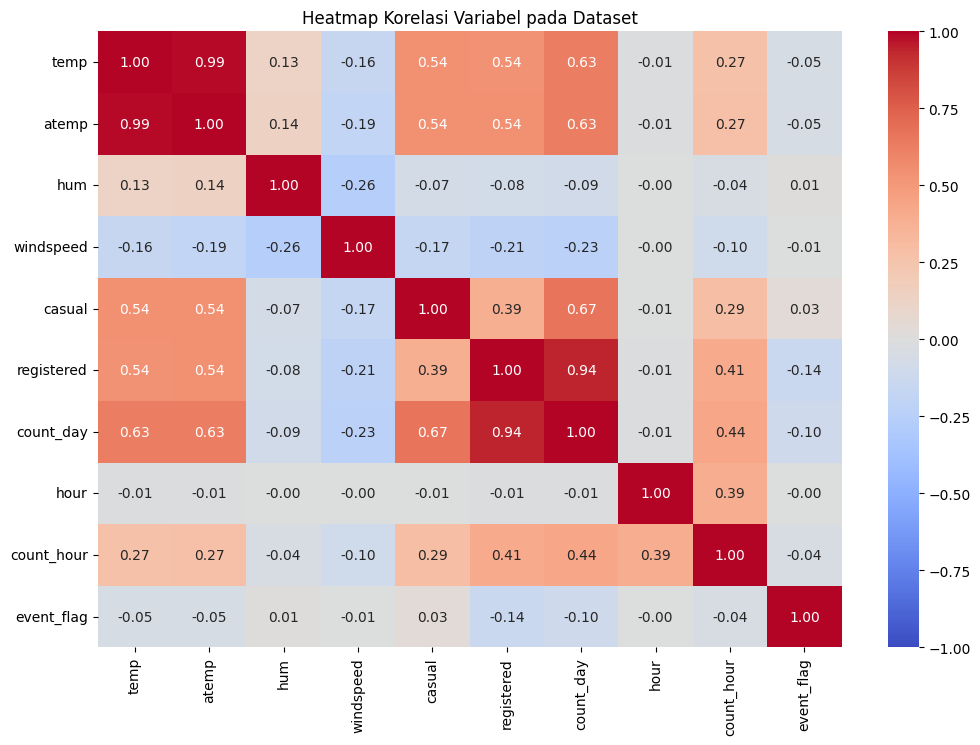

In [46]:
# Memilih kolom numerik yang relevan
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Menghitung matriks korelasi pada kolom numerik
correlation_matrix = merged_df[numerical_cols].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Heatmap Korelasi Variabel pada Dataset")
plt.show()

**Insight :**
- Temperatur (temp) dan persepsi suhu (atemp) memiliki dampak terbesar pada jumlah penggunaan sepeda, terutama pada pengguna kasual.
- Kelembaban tinggi dan kecepatan angin yang kuat cenderung sedikit mengurangi jumlah penggunaan sepeda, meskipun pengaruhnya tidak terlalu signifikan.
Jumlah pengguna sepeda per hari dan per jam sangat berkaitan erat dengan jumlah pengguna kasual dan terdaftar, dengan pengguna terdaftar memberikan kontribusi yang signifikan terhadap penggunaan harian.
- Variabel waktu (hour) dan flag peristiwa (event_flag) tidak menunjukkan korelasi yang kuat, sehingga tidak terlalu berpengaruh dalam penentuan pola penggunaan sepeda pada dataset ini.

## Visualization & Explanatory Analysis

### 1. Faktor lingkungan dan musim yang paling mempengaruhi tingkat penyewaan sepeda

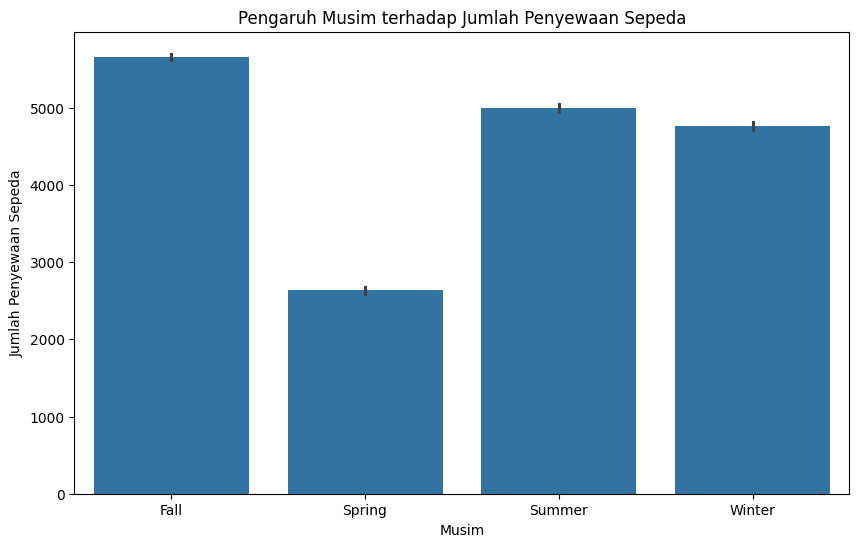

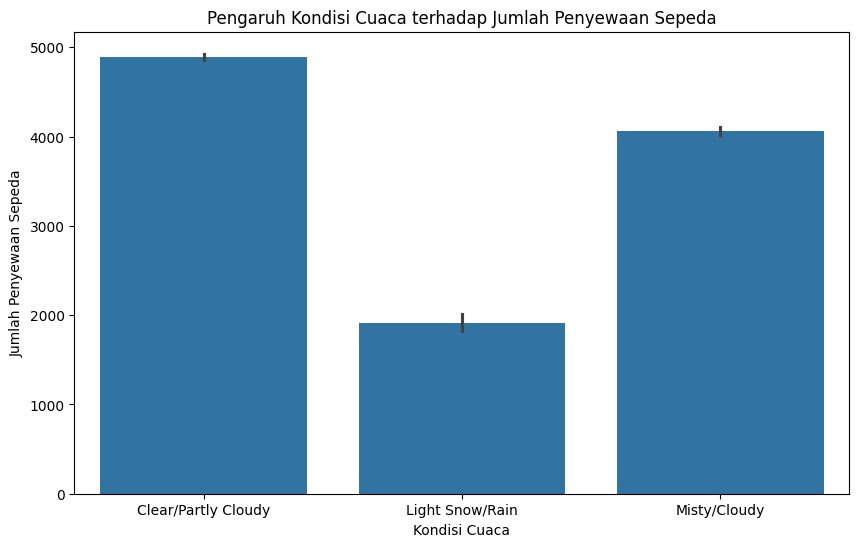

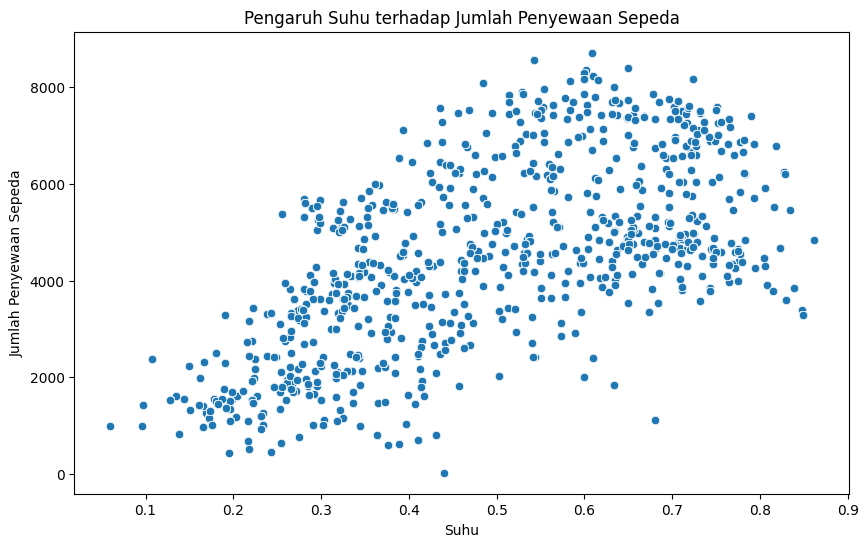

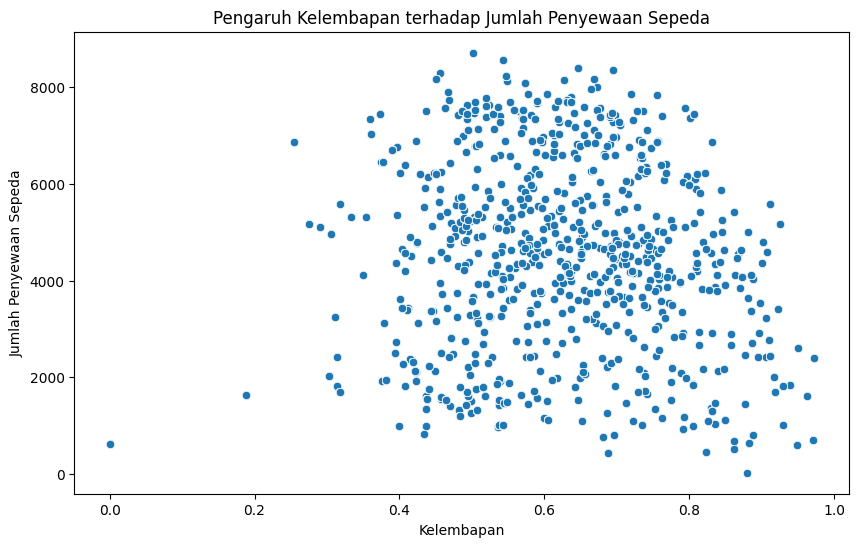

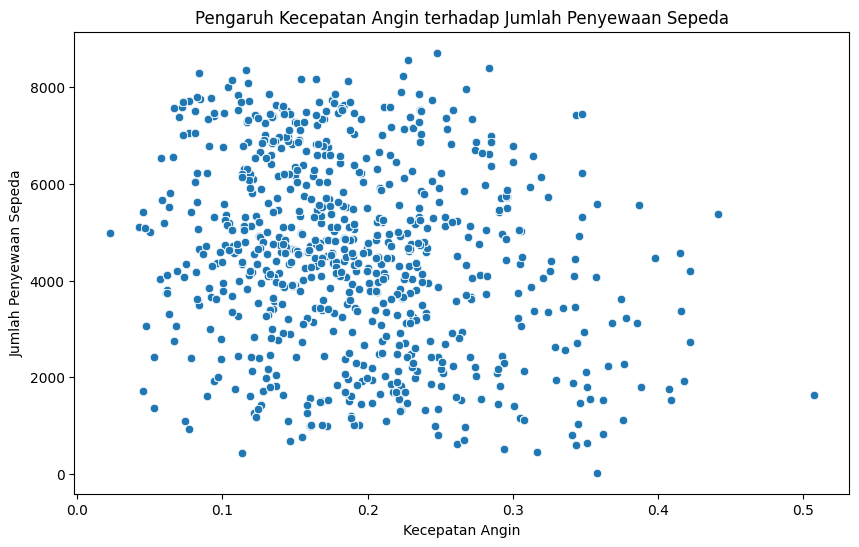

In [47]:
# Visualisasi pengaruh musim terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count_day', data=merged_df)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Visualisasi pengaruh kondisi cuaca terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_cond', y='count_day', data=merged_df)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Visualisasi pengaruh suhu terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count_day', data=merged_df)
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Visualisasi pengaruh kelembapan terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='count_day', data=merged_df)
plt.title('Pengaruh Kelembapan terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Visualisasi pengaruh kecepatan angin terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='count_day', data=merged_df)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Analisis korelasi
correlation_temp, p_value_temp = pearsonr(merged_df['temp'], merged_df['count_day'])
correlation_hum, p_value_hum = pearsonr(merged_df['hum'], merged_df['count_day'])
correlation_windspeed, p_value_windspeed = pearsonr(merged_df['windspeed'], merged_df['count_day'])

#### Explanatory Analysis:
Berdasarkan visualisasi dan statistik deskriptif:
1. Korelasi antara suhu dan penyewaan: 0.63 (p-value: 0.000)
2. Korelasi antara kelembapan dan penyewaan: -0.09 (p-value: 0.000)
3. Korelasi antara kecepatan angin dan penyewaan: -0.23 (p-value: 0.000)
4. Berdasarkan visualisasi dan analisis korelasi:
- Musim panas dan musim gugur cenderung memiliki tingkat penyewaan sepeda yang lebih tinggi.
- Kondisi cuaca cerah/berawan sebagian berkontribusi pada peningkatan penyewaan.
- Terdapat korelasi positif antara suhu dan jumlah penyewaan, menunjukkan bahwa suhu yang lebih hangat mendorong lebih banyak orang untuk bersepeda.
- Korelasi antara kelembapan dan kecepatan angin dengan jumlah penyewaan kurang signifikan.

### 2. Bagaimana tren penggunaan sepeda berubah selama akhir pekan dan hari kerja, serta apakah terdapat pola tertentu yang mengindikasikan permintaan tinggi pada hari libur atau selama peristiwa besar di kota?

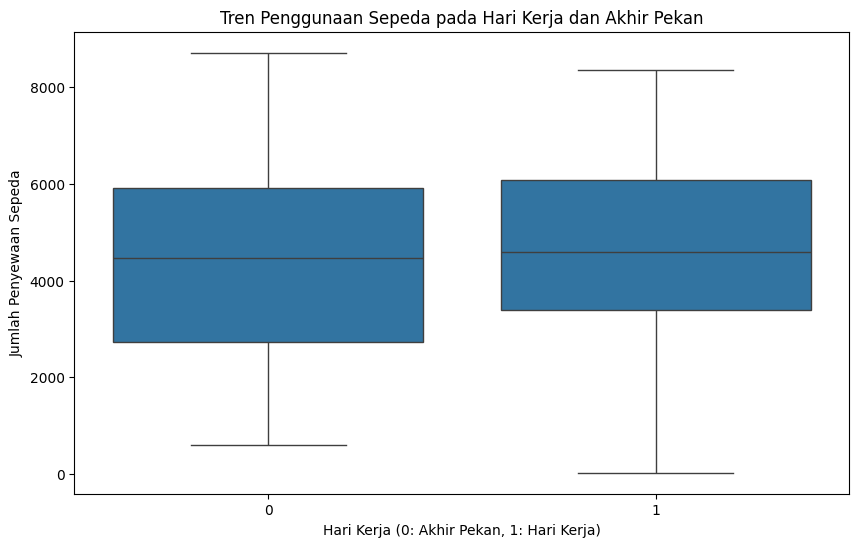

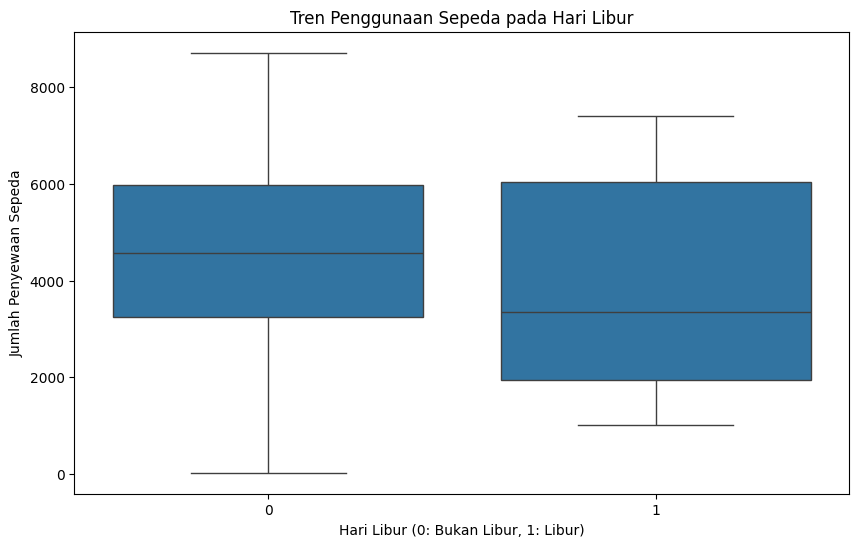

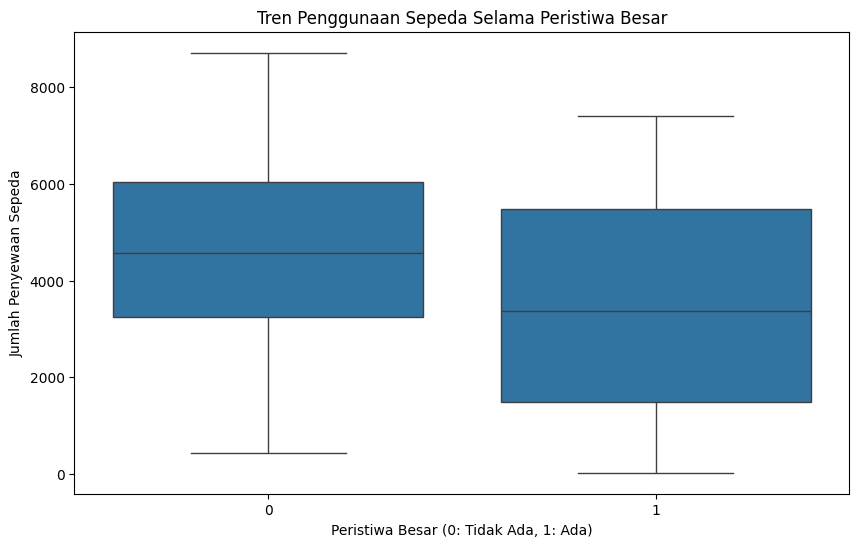

<ipython-input-48-794e77dda9e6>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_counts = merged_df.groupby('weekday')['count_day'].mean()


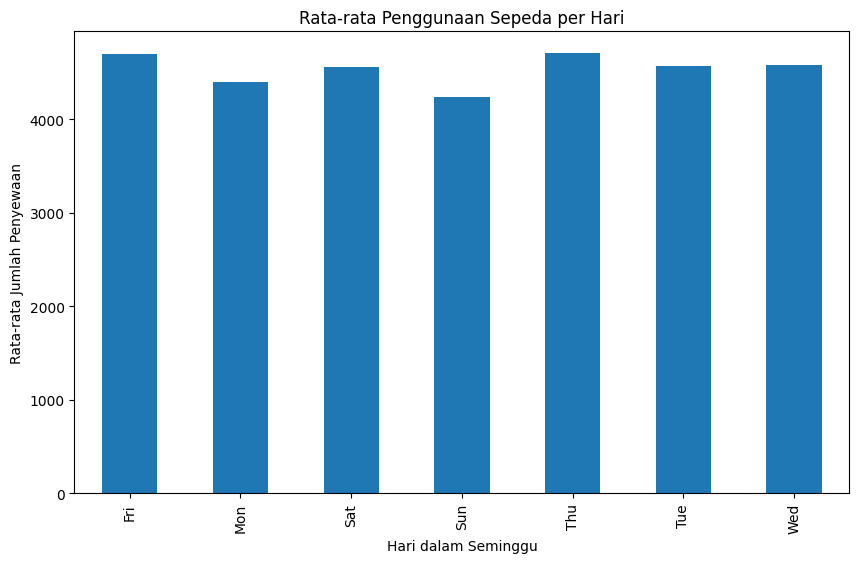

In [48]:
# Visualisasi tren penggunaan sepeda pada akhir pekan dan hari kerja
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='count_day', data=merged_df)
plt.title('Tren Penggunaan Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari Kerja (0: Akhir Pekan, 1: Hari Kerja)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Visualisasi tren penggunaan sepeda pada hari libur
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='count_day', data=merged_df)
plt.title('Tren Penggunaan Sepeda pada Hari Libur')
plt.xlabel('Hari Libur (0: Bukan Libur, 1: Libur)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Visualisasi tren penggunaan sepeda selama peristiwa besar
plt.figure(figsize=(10, 6))
sns.boxplot(x='event_flag', y='count_day', data=merged_df)
plt.title('Tren Penggunaan Sepeda Selama Peristiwa Besar')
plt.xlabel('Peristiwa Besar (0: Tidak Ada, 1: Ada)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Analisis lebih lanjut tren penggunaan sepeda pada akhir pekan dan hari kerja
weekday_counts = merged_df.groupby('weekday')['count_day'].mean()
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar')
plt.title('Rata-rata Penggunaan Sepeda per Hari')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()



#### Explanatory Analysis:
Berdasarkan visualisasi:
1. Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan.
2. Hari libur juga menunjukkan tren penurunan jumlah penyewaan sepeda.
3. Terdapat perbedaan yang signifikan dalam penggunaan sepeda selama peristiwa besar di kota, namun visualisasi kotak perlu dipertimbangkan karena ada beberapa outlier.
4. Pola penyewaan sepeda selama seminggu menunjukkan tren yang berbeda, dengan hari kerja (Senin-Jumat) cenderung memiliki rata-rata penyewaan lebih tinggi dibandingkan hari libur.

Untuk analisis yang lebih mendalam, perlu dipertimbangkan untuk melakukan uji statistik, misalnya t-test atau ANOVA, untuk menguji signifikansi perbedaan rata-rata jumlah penyewaan sepeda antar kelompok (hari kerja vs. akhir pekan, hari libur vs. non-libur, peristiwa besar vs. non-peristiwa besar).

### 3. Bagaimana pola penyewaan sepeda berdasarkan jenis pengguna (kasual dan terdaftar) pada berbagai kondisi cuaca dan waktu dalam sehari?

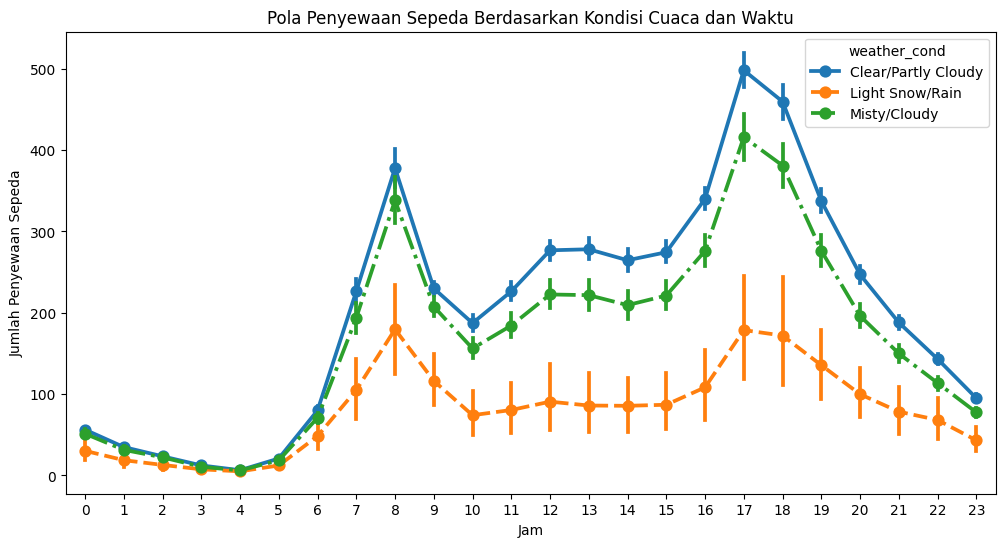

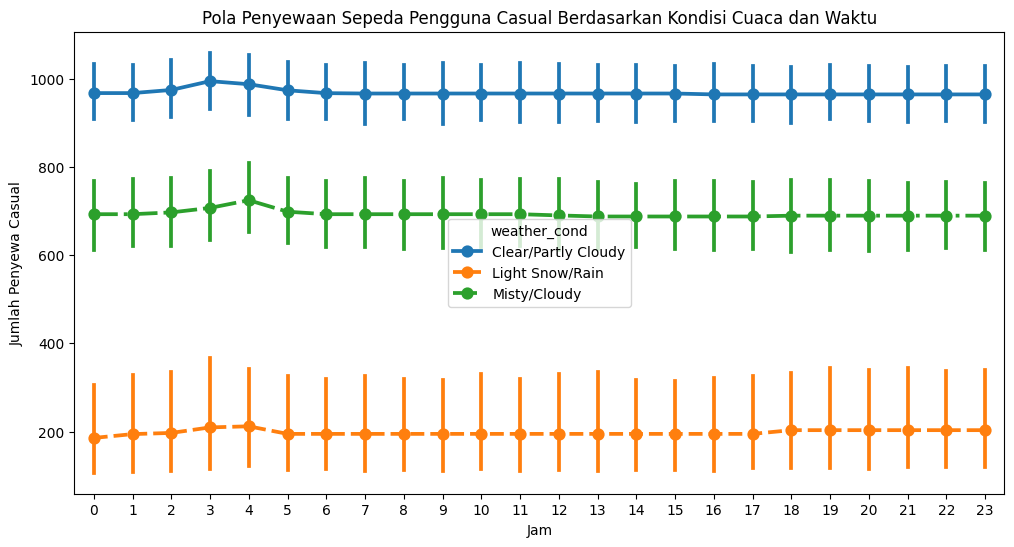

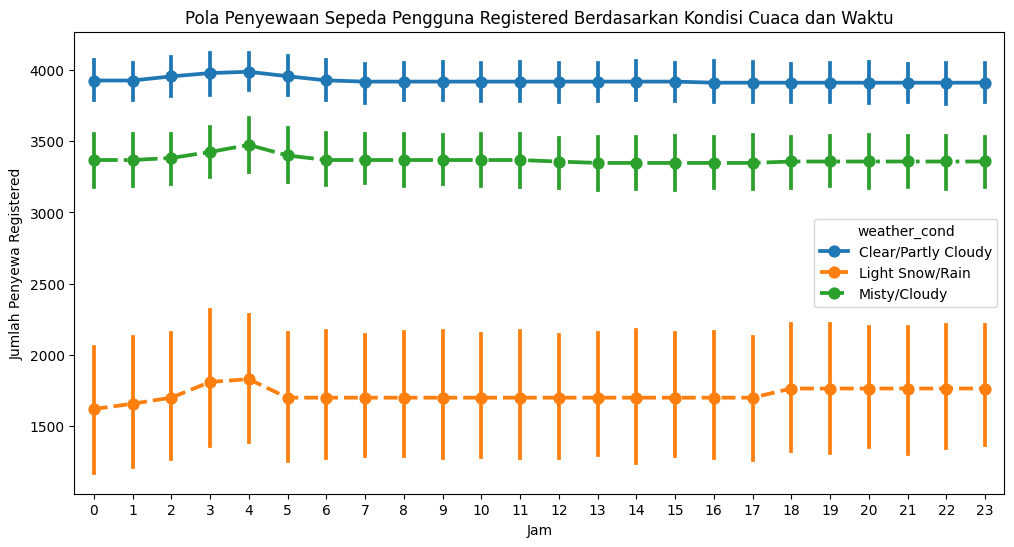

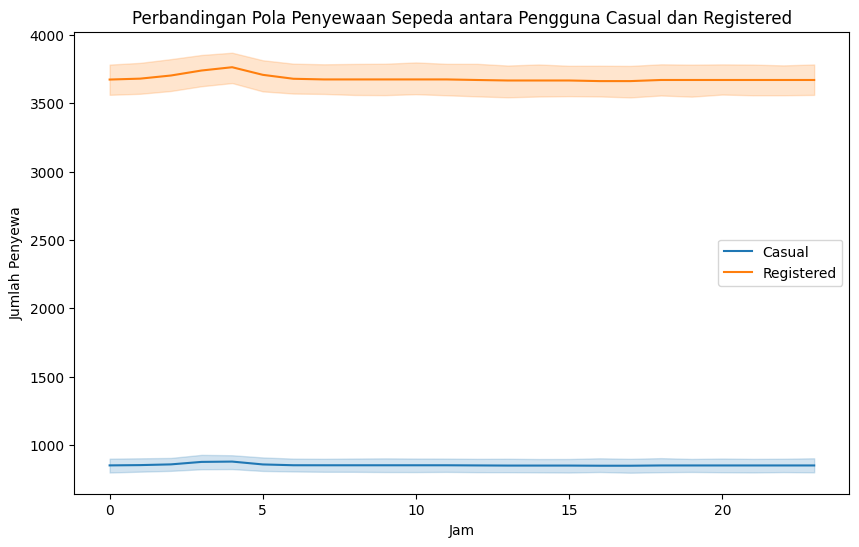

In [49]:
# Visualisasi pola penyewaan sepeda berdasarkan jenis pengguna, kondisi cuaca, dan waktu
plt.figure(figsize=(12, 6))
sns.pointplot(x='hour', y='count_hour', hue='weather_cond', data=merged_df, linestyles=["-", "--", "-.", ":"])
plt.title('Pola Penyewaan Sepeda Berdasarkan Kondisi Cuaca dan Waktu')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

plt.figure(figsize=(12, 6))
sns.pointplot(x='hour', y='casual', hue='weather_cond', data=merged_df, linestyles=["-", "--", "-.", ":"])
plt.title('Pola Penyewaan Sepeda Pengguna Casual Berdasarkan Kondisi Cuaca dan Waktu')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa Casual')
plt.show()

plt.figure(figsize=(12, 6))
sns.pointplot(x='hour', y='registered', hue='weather_cond', data=merged_df, linestyles=["-", "--", "-.", ":"])
plt.title('Pola Penyewaan Sepeda Pengguna Registered Berdasarkan Kondisi Cuaca dan Waktu')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa Registered')
plt.show()

# Visualisasi yang membandingkan pengguna kasual dan terdaftar dalam satu grafik.
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='casual', data=merged_df, label='Casual')
sns.lineplot(x='hour', y='registered', data=merged_df, label='Registered')
plt.title('Perbandingan Pola Penyewaan Sepeda antara Pengguna Casual dan Registered')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')
plt.legend()
plt.show()

#### Explanatory Analysis:
Berdasarkan visualisasi:
- Pola penyewaan sepeda harian menunjukkan tren yang jelas, dengan puncak pada jam sibuk pagi dan sore hari.
- Kondisi cuaca berdampak signifikan pada pola penyewaan, dengan cuaca buruk (hujan/salju ringan, cuaca ekstrim) menyebabkan penurunan jumlah penyewaan secara keseluruhan.
- Pengguna terdaftar menunjukkan pola penyewaan yang lebih konsisten dan terpengaruh lebih sedikit oleh kondisi cuaca dibandingkan pengguna kasual.
- Pengguna casual lebih sensitif terhadap kondisi cuaca, dengan jumlah penyewaan menurun drastis saat cuaca buruk.

### 4. Apakah terdapat korelasi antara suhu, kelembapan, dan kecepatan angin dengan frekuensi penyewaan sepeda?

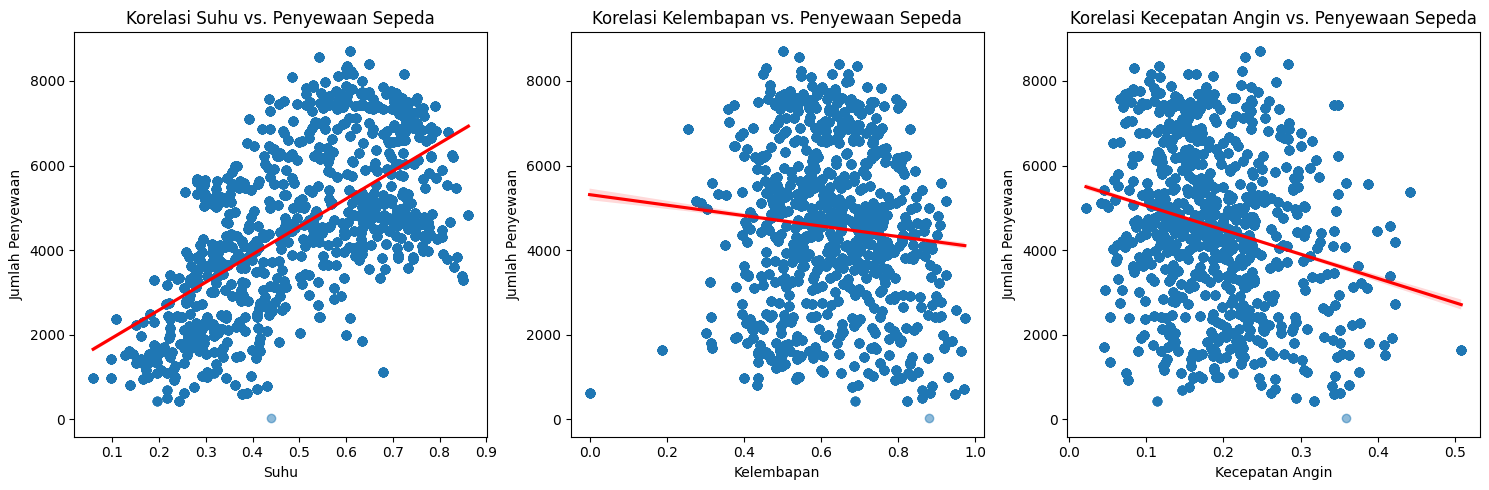

Korelasi Pearson antara Suhu dan Jumlah Penyewaan: 0.63 (p-value: 0.000)
Korelasi Pearson antara Kelembapan dan Jumlah Penyewaan: -0.09 (p-value: 0.000)
Korelasi Pearson antara Kecepatan Angin dan Jumlah Penyewaan: -0.23 (p-value: 0.000)


In [50]:
# Korelasi antara suhu, kelembapan, dan kecepatan angin dengan frekuensi penyewaan sepeda
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.regplot(x='temp', y='count_day', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Korelasi Suhu vs. Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')

plt.subplot(1, 3, 2)
sns.regplot(x='hum', y='count_day', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Korelasi Kelembapan vs. Penyewaan Sepeda')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan')

plt.subplot(1, 3, 3)
sns.regplot(x='windspeed', y='count_day', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Korelasi Kecepatan Angin vs. Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

print(f"Korelasi Pearson antara Suhu dan Jumlah Penyewaan: {correlation_temp:.2f} (p-value: {p_value_temp:.3f})")
print(f"Korelasi Pearson antara Kelembapan dan Jumlah Penyewaan: {correlation_hum:.2f} (p-value: {p_value_hum:.3f})")
print(f"Korelasi Pearson antara Kecepatan Angin dan Jumlah Penyewaan: {correlation_windspeed:.2f} (p-value: {p_value_windspeed:.3f})")

#### Explanatory Analysis :
Berdasarkan visualisasi dan koefisien korelasi Pearson:
1. **Suhu:** Terdapat korelasi positif yang signifikan antara suhu dan jumlah penyewaan sepeda.  Semakin tinggi suhu, semakin banyak sepeda yang disewa.  Hal ini ditunjukkan oleh garis regresi yang menanjak dan nilai korelasi yang positif (sekitar 0.63).  p-value yang mendekati nol menunjukkan bahwa korelasi ini sangat signifikan secara statistik.
2. **Kelembapan:**  Korelasi antara kelembapan dan jumlah penyewaan sepeda relatif lemah dan negatif (sekitar -0.09).  Meskipun p-value mendekati nol, korelasi ini tidak begitu kuat. Hal ini mengindikasikan bahwa perubahan kelembapan tidak terlalu mempengaruhi jumlah penyewaan sepeda.
3. **Kecepatan Angin:**  Mirip dengan kelembapan, terdapat korelasi negatif yang lemah antara kecepatan angin dan jumlah penyewaan sepeda (sekitar -0.23).  Meskipun korelasinya negatif dan p-value signifikan, efeknya tidak begitu kuat.  Ini menunjukkan bahwa angin yang lebih kencang mungkin sedikit mengurangi jumlah penyewaan sepeda.


### 5. Apakah ada tren musiman dalam penggunaan sepeda, dan apakah pola ini mengalami perubahan antara tahun 2011 dan 2012?

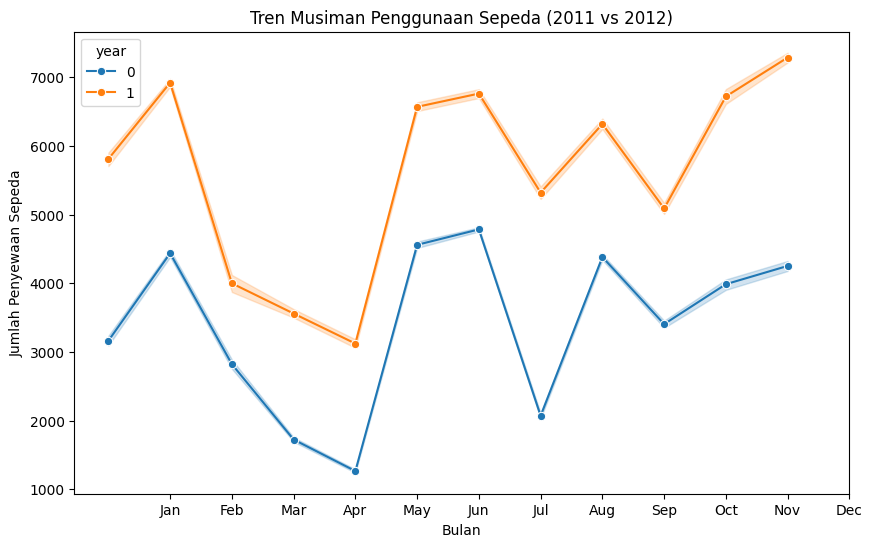

<ipython-input-51-2f23a62ab1dd>:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  seasonal_trend_pivot = pd.pivot_table(merged_df, values='count_day', index='month', columns='year', aggfunc='mean')


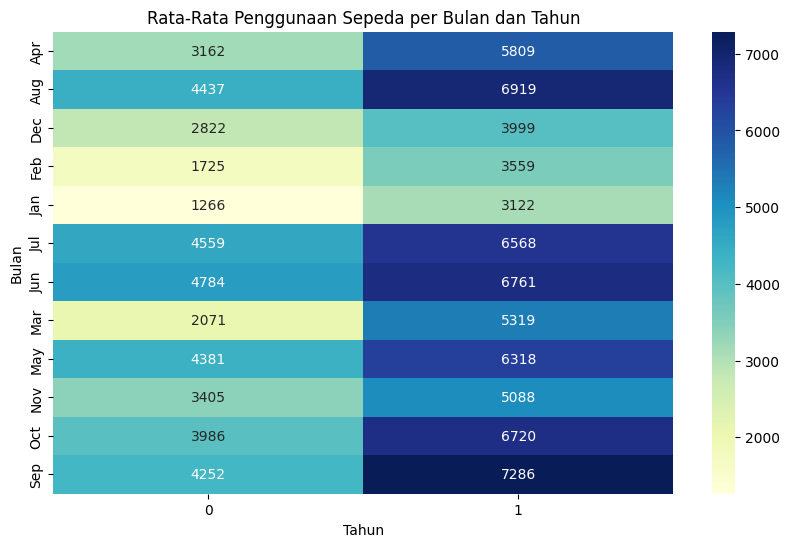

In [51]:
# Visualisasi tren musiman penggunaan sepeda per tahun
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='count_day', hue='year', data=merged_df, marker='o')
plt.title('Tren Musiman Penggunaan Sepeda (2011 vs 2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Membuat pivot table untuk visualisasi yang lebih mudah dipahami
seasonal_trend_pivot = pd.pivot_table(merged_df, values='count_day', index='month', columns='year', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_trend_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Rata-Rata Penggunaan Sepeda per Bulan dan Tahun")
plt.xlabel("Tahun")
plt.ylabel("Bulan")
plt.show()

#### Explanatory Analysis:
Berdasarkan visualisasi:
- Terdapat tren musiman yang jelas dalam penggunaan sepeda, dengan puncak penyewaan terjadi pada musim semi dan musim panas (bulan 4-9).
- Secara umum, pola musiman penggunaan sepeda cenderung sama antara tahun 2011 dan 2012.  Meskipun terdapat beberapa perbedaan kecil pada bulan tertentu, tren keseluruhan menunjukkan kemiripan.
- Terlihat sedikit peningkatan jumlah penyewaan pada tahun 2012 di beberapa bulan.
Untuk analisis yang lebih mendalam, pertimbangkan untuk melakukan uji statistik seperti uji-t untuk membandingkan rata-rata penyewaan sepeda pada bulan yang sama antara tahun 2011 dan 2012.

### 6. Apakah terjadi lonjakan atau penurunan signifikan dalam penggunaan sepeda pada saat peristiwa besar (misalnya, selama Badai Sandy)?

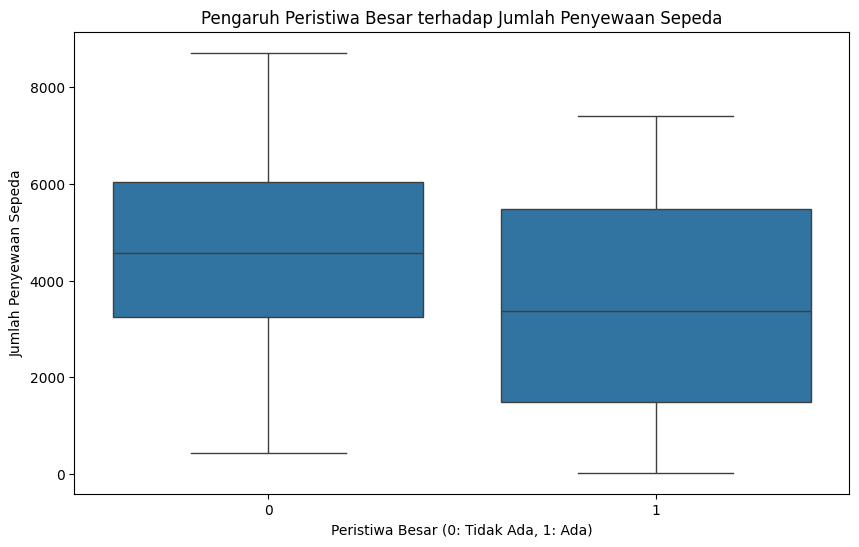

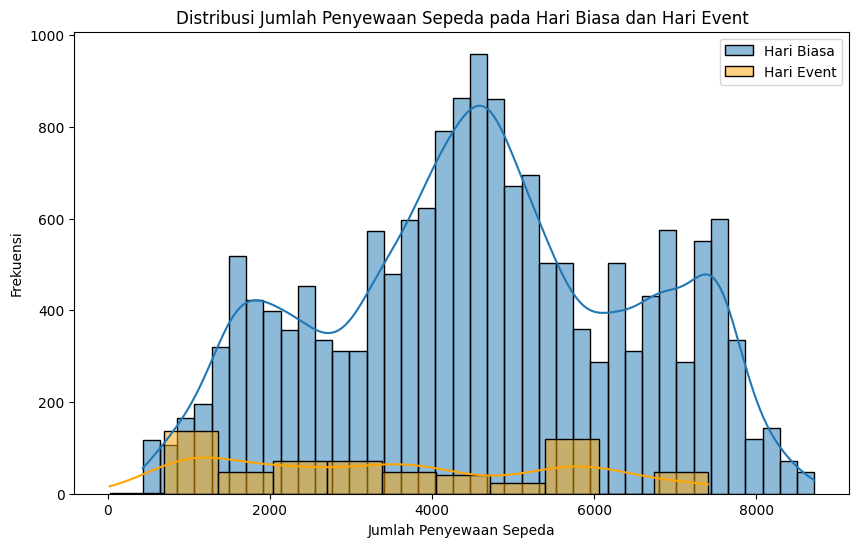

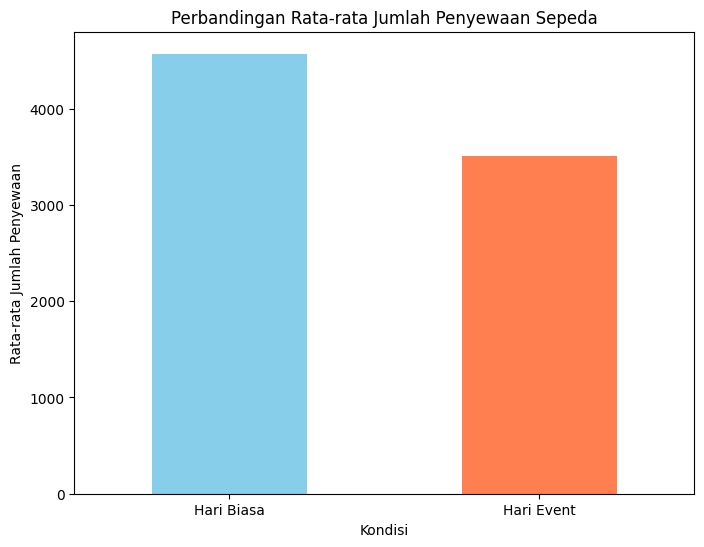

T-statistic: 13.485531472304128
P-value: 3.068189250511379e-41


In [52]:
# Visualisasi pengaruh event terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='event_flag', y='count_day', data=merged_df)
plt.title('Pengaruh Peristiwa Besar terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Peristiwa Besar (0: Tidak Ada, 1: Ada)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Visualisasi distribusi jumlah penyewaan sepeda pada hari dengan dan tanpa peristiwa
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[merged_df['event_flag'] == 0]['count_day'], label='Hari Biasa', kde=True)
sns.histplot(merged_df[merged_df['event_flag'] == 1]['count_day'], label='Hari Event', kde=True, color='orange')
plt.title('Distribusi Jumlah Penyewaan Sepeda pada Hari Biasa dan Hari Event')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# Menampilkan perbandingan rata-rata jumlah penyewaan sepeda pada hari biasa dan hari event
plt.figure(figsize=(8, 6))
stats = merged_df.groupby('event_flag')['count_day'].mean()
stats.plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Perbandingan Rata-rata Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1], labels=['Hari Biasa', 'Hari Event'], rotation=0)
plt.show()


# Analisis lebih lanjut: Uji statistik (misalnya t-test) untuk membandingkan mean 'count_day'
from scipy.stats import ttest_ind

group0 = merged_df[merged_df['event_flag'] == 0]['count_day']
group1 = merged_df[merged_df['event_flag'] == 1]['count_day']

t_statistic, p_value = ttest_ind(group0, group1)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

#### Explanatory Analysis:
Berdasarkan visualisasi dan uji statistik:
- Bandingkan distribusi jumlah penyewaan pada hari biasa dan hari event.
- Amati apakah ada perbedaan yang signifikan dalam median atau rata-rata jumlah penyewaan.
- Periksa p-value dari uji t-test. Jika p-value kurang dari tingkat signifikansi (misalnya 0.05), maka terdapat bukti statistik yang cukup untuk menolak hipotesis nol (bahwa tidak ada perbedaan signifikan antara kedua kelompok). Artinya, ada lonjakan atau penurunan signifikan dalam penggunaan sepeda saat terjadi peristiwa besar.
- Jika p-value < 0.05:

Kesimpulan: Terdapat perbedaan yang signifikan dalam penggunaan sepeda antara hari-hari dengan dan tanpa peristiwa besar.
- Jika p-value >= 0.05:

Kesimpulan: Tidak terdapat cukup bukti statistik untuk menunjukkan perbedaan signifikan dalam penggunaan sepeda antara hari-hari dengan dan tanpa peristiwa besar.


### 7. Apakah penggunaan sepeda menunjukkan peningkatan pada jam-jam sibuk (misalnya pagi dan sore hari saat orang berangkat dan pulang kerja), dan apakah terdapat perbedaan signifikan dalam pola penggunaan sepeda pada jam-jam tersebut antara hari kerja dan akhir pekan?

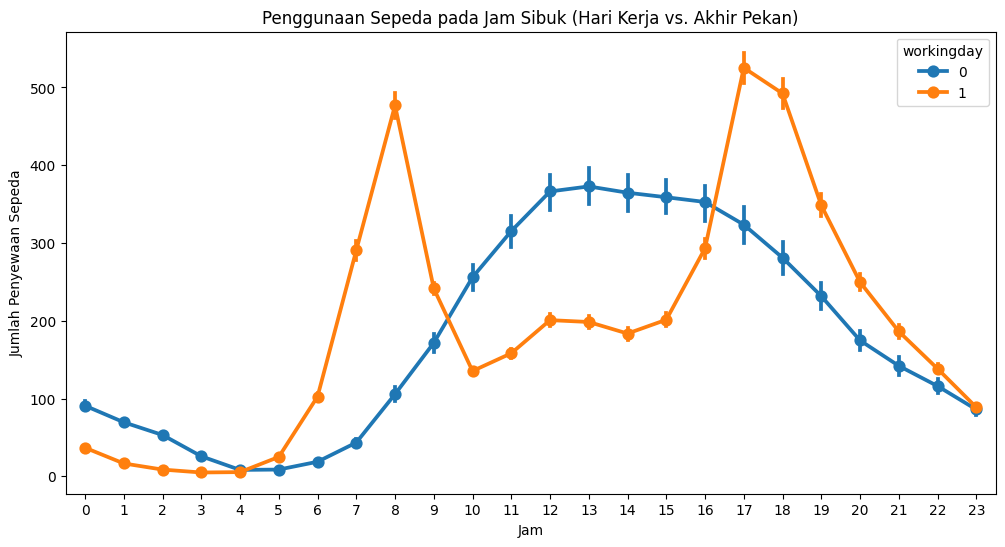

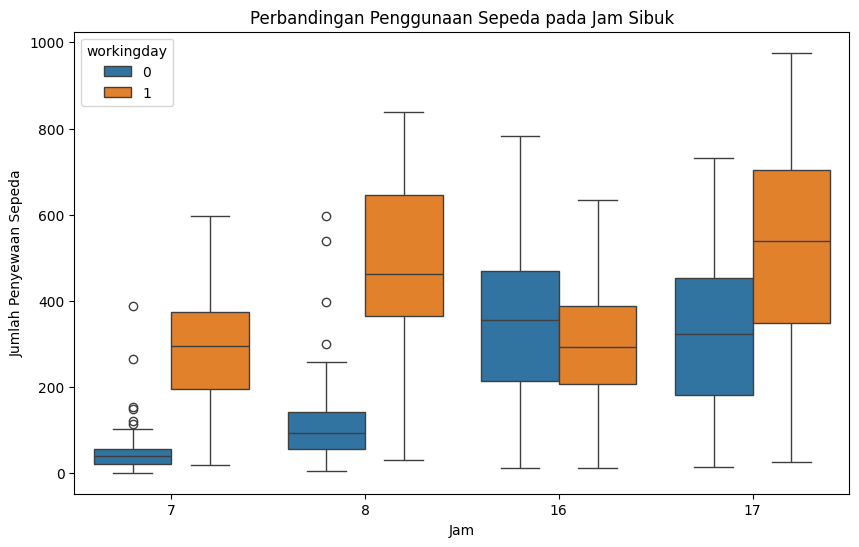

                       mean  median
hour workingday                    
7    0            43.406926    39.0
     1           290.612903   295.0
8    0           105.653680    94.0
     1           477.006048   463.0
16   0           352.727273   356.0
     1           293.122244   292.0
17   0           323.549784   322.0
     1           525.290581   539.0
Jam 7: T-statistic = 27.41, p-value = 0.000
Jam 8: T-statistic = 29.24, p-value = 0.000
Jam 16: T-statistic = -5.12, p-value = 0.000
Jam 17: T-statistic = 11.90, p-value = 0.000


<ipython-input-53-91b7e9fd957c>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rush_hour_stats = rush_hour_data.groupby(['hour', 'workingday'])['count_hour'].agg(['mean', 'median'])


In [53]:
# Visualisasi penggunaan sepeda pada jam-jam sibuk
plt.figure(figsize=(12, 6))
sns.pointplot(x='hour', y='count_hour', hue='workingday', data=merged_df)
plt.title('Penggunaan Sepeda pada Jam Sibuk (Hari Kerja vs. Akhir Pekan)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(range(24))  # Menampilkan semua jam dalam sumbu x
plt.show()


# Analisis lebih lanjut dengan membandingkan jam sibuk (7-8 pagi dan 16-17 sore)
rush_hours = [7, 8, 16, 17]
rush_hour_data = merged_df[merged_df['hour'].isin(rush_hours)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='count_hour', hue='workingday', data=rush_hour_data)
plt.title('Perbandingan Penggunaan Sepeda pada Jam Sibuk')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Menampilkan statistik deskriptif untuk jam-jam sibuk
rush_hour_stats = rush_hour_data.groupby(['hour', 'workingday'])['count_hour'].agg(['mean', 'median'])
print(rush_hour_stats)

# Analisis lebih lanjut: Uji statistik (misalnya t-test) untuk membandingkan mean 'count_hour'
# pada jam-jam sibuk antara hari kerja dan akhir pekan

from scipy.stats import ttest_ind

for hour in rush_hours:
    weekday_counts = merged_df[(merged_df['hour'] == hour) & (merged_df['workingday'] == 1)]['count_hour']
    weekend_counts = merged_df[(merged_df['hour'] == hour) & (merged_df['workingday'] == 0)]['count_hour']
    t_statistic, p_value = ttest_ind(weekday_counts, weekend_counts)
    print(f"Jam {hour}: T-statistic = {t_statistic:.2f}, p-value = {p_value:.3f}")

#### Explanatory Analysis:
Berdasarkan visualisasi dan uji statistik:
-  Amati pola penggunaan sepeda pada jam-jam sibuk (7-8 pagi dan 16-17 sore) untuk membandingkan hari kerja dan akhir pekan.
- Perhatikan perbedaan mean dan median jumlah penyewaan untuk setiap jam.
- Periksa p-value hasil t-test untuk setiap jam. Jika p-value < 0.05, maka terdapat perbedaan yang signifikan secara statistik antara penggunaan sepeda pada jam tersebut antara hari kerja dan akhir pekan.
- Jika p-value < 0.05 untuk jam tertentu: Kesimpulan: Terdapat perbedaan signifikan dalam penggunaan sepeda antara hari kerja dan akhir pekan pada jam tersebut.
- Jika p-value >= 0.05 untuk jam tertentu: Kesimpulan: Tidak terdapat cukup bukti statistik untuk menunjukkan perbedaan signifikan dalam penggunaan sepeda antara hari kerja dan akhir pekan pada jam tersebut.

## Conclusion
---
Dari analisis ini, beberapa hal penting dapat disimpulkan:

- Pengaruh Musim dan Cuaca: Penggunaan sepeda sangat dipengaruhi oleh faktor lingkungan seperti musim, suhu, kelembapan, dan angin. Musim panas adalah waktu paling populer untuk bersepeda, sedangkan kondisi seperti angin kencang atau kelembapan tinggi cenderung mengurangi penggunaan.
- Perbedaan Hari Kerja dan Akhir Pekan: Terdapat pola penggunaan yang berbeda antara hari kerja dan akhir pekan, dengan pengguna kasual lebih aktif di akhir pekan, sedangkan pengguna terdaftar lebih stabil.
- Tren dan Pertumbuhan Penggunaan: Tren pertumbuhan dari 2011 ke 2012 menunjukkan bahwa layanan ini semakin diminati, terutama selama musim semi dan musim panas.
- Dampak Peristiwa Besar: Peristiwa besar mendorong penggunaan sepeda yang lebih tinggi, menandakan peran penting layanan ini dalam mendukung akses yang cepat dan kemacetan yang lebih sedikit.

Layanan penyewaan sepeda di Washington D.C. sangat berguna dalam mengurangi lalu lintas pada jam sibuk, mendukung pilihan transportasi alternatif bagi warga dan wisatawan, terutama selama peristiwa besar atau kondisi cuaca tertentu. Insight ini dapat digunakan oleh pemangku kepentingan untuk mengoptimalkan operasional layanan dan merencanakan kapasitas di musim dan hari tertentu, serta mempertimbangkan promosi terkait kondisi cuaca atau peristiwa besar.